## Load packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

from skimage import measure

from IPython import display #note this is only to display images (my screenshots)

## Define functions

### Sigmoid

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = (1) / (1+np.exp(-z))
    
    return s

### Initialize weights

In [5]:
def initialize_weights(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim, 1))
    b = 0
  
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### Forward and backward propagation

In [29]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained in the assignment

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
   
    y_hat = sigmoid(np.dot(w.T, X.T) + b)

    #−𝑦(") 𝑙𝑜𝑔/𝑦"(")0 − /1 − 𝑦(")0 𝑙𝑜𝑔/1 − 𝑦"(")0
    term1 = np.dot(-Y, (np.log(y_hat)).T)
    term2 = np.dot(1-Y, (np.log(1-y_hat)).T)
    cost = (-1/m) * np.sum(term1 + term2)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    # calcualte dw and db 
    # dw = (dj/dy_hat) * (dy_hat/dz) * (dz/dw) or simply dj/dw
    # db = (dj/dy_hat) * (dy_hat/dz) * (dz/db) or simply dj/dz where j = loss
    
    dw = (1/m) * np.dot(X.T,(y_hat-Y).T)
    db = (1/m) * np.sum((y_hat-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Gradient descent

In [7]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
      
        grads, cost = propagate(w, b, X, Y)
      
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training examples
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
  

### Make predictions

In [8]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of the picture containing a 1
    
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        
        # if it's greater than or equal to 0.5, we are classifying as 1, else 0.
        if A[0][i] >= 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Merge functions and run your model

In [ ]:
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



### Train the model (in training set)

In [ ]:
# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, 2000, 0.005)

Cost after iteration 0: 0.044823
Cost after iteration 100: 0.053219
Cost after iteration 200: 0.028414
Cost after iteration 300: 0.019220
Cost after iteration 400: 0.014541
Cost after iteration 500: 0.011721
Cost after iteration 600: 0.009838
Cost after iteration 700: 0.008492
Cost after iteration 800: 0.007483
Cost after iteration 900: 0.006698
Cost after iteration 1000: 0.006070
Cost after iteration 1100: 0.005556
Cost after iteration 1200: 0.005127
Cost after iteration 1300: 0.004764
Cost after iteration 1400: 0.004453
Cost after iteration 1500: 0.004184
Cost after iteration 1600: 0.003948
Cost after iteration 1700: 0.003740
Cost after iteration 1800: 0.003555
Cost after iteration 1900: 0.003389


### Test the model (in testing set)


train accuracy: 99.73943939992104 %
test accuracy: 99.90543735224587 %



Text(0.5, 1.0, 'Template')

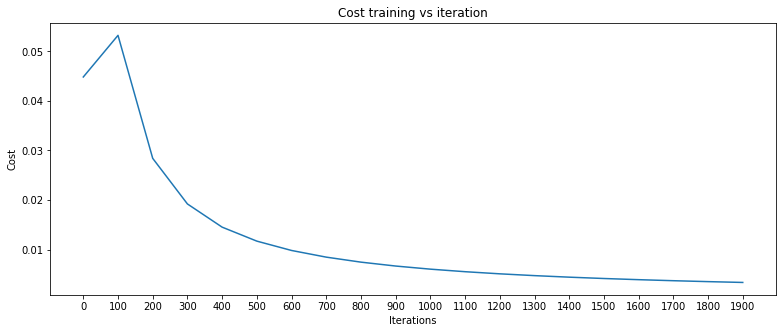

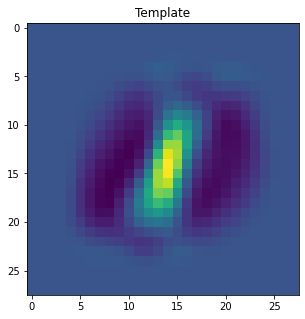

In [ ]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')


In [17]:
def balanced_accuracy(y_true, y_pred):
    y_true = y_true.squeeze()
    y_pred = y_pred.squeeze()
    def tp(y_true, y_pred):
        '''calculates true positive'''
        ct = 0
        for idx in range(len(y_pred)):
            if y_pred[idx]==1 and y_true[idx]==1:
                ct+=1
        return ct

    def tn(y_true, y_pred):
        '''calculate true negative'''
        ct = 0
        for idx in range(len(y_pred)):
            if y_pred[idx]==0 and y_true[idx]==0:
                ct+=1
        return ct

    def fp(y_true, y_pred):
        '''calculates false positives (predicting 1 when its actually 0)'''
        ct = 0
        for idx in range(len(y_pred)):
            if y_pred[idx]==1 and y_true[idx]==0: #predicted positive when in reality it was negative
                ct+=1
        return ct
    
    def fn(y_true, y_pred):
        '''calculates false negatives (predicting 0 when it's actually 1)'''
        ct = 0
        for idx in range(len(y_pred)):
            if y_pred[idx]==0 and y_true[idx]==1:
                ct+=1
        return ct

    # Now we can return the balanced classification accuracy
    sensitivity = tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred))
    specificity = tn(y_true, y_pred) / (tn(y_true, y_pred) + fp(y_true, y_pred))

    return np.round(0.5 * (sensitivity + specificity), 3) * 100


In [ ]:
balanced_accuracy(y_true=y_test, y_pred=y_prediction_test)

99.9

Pretty good balanced accuracy for seperating 0s and 1s

### Re-training network and evaluating for seperating `5`s and `6`s

In [30]:
# LOAD DATA
class0 = 5
class1 = 6

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

In [31]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, num_iterations, learning_rate) 

(11339, 784)
Train: 11339 images and 784 neurons 

(1850, 784)
Test: 1850 images and 784 neurons 

Cost after iteration 0: -0.030381
Cost after iteration 100: 0.040954
Cost after iteration 200: 0.030977
Cost after iteration 300: 0.025912
Cost after iteration 400: 0.022683
Cost after iteration 500: 0.020383
Cost after iteration 600: 0.018641
Cost after iteration 700: 0.017268
Cost after iteration 800: 0.016155
Cost after iteration 900: 0.015234
Cost after iteration 1000: 0.014458
Cost after iteration 1100: 0.013795
Cost after iteration 1200: 0.013224
Cost after iteration 1300: 0.012725
Cost after iteration 1400: 0.012287
Cost after iteration 1500: 0.011900
Cost after iteration 1600: 0.011555
Cost after iteration 1700: 0.011246
Cost after iteration 1800: 0.010968
Cost after iteration 1900: 0.010716



train accuracy: 96.772202134227 %
test accuracy: 97.24324324324324 %



Text(0.5, 1.0, 'Template')

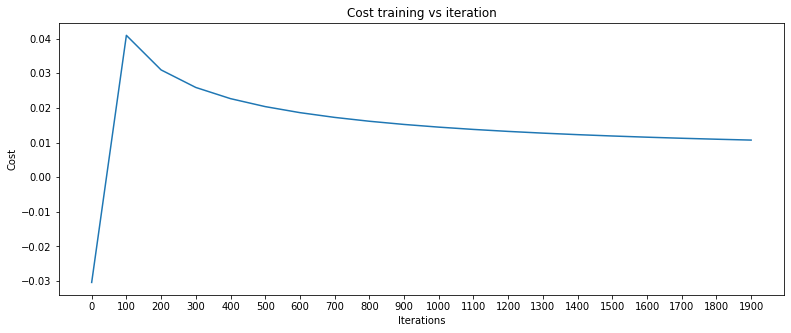

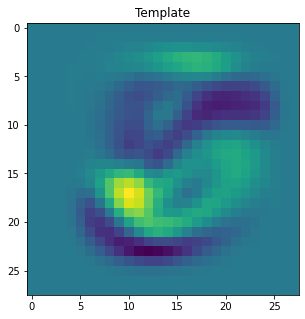

In [33]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')


In [34]:
y_preds = predict(w, b, x_test_flat)

Comparing the accuracy for the test set we can see that there is a clear decrease in performance when comparing it to the classifier for 0s and 1s.
We had almost 99.5% accuracy across the board for 0s and 1s

In [35]:
balanced_accuracy(y_true=y_test, y_pred=y_preds)

97.2

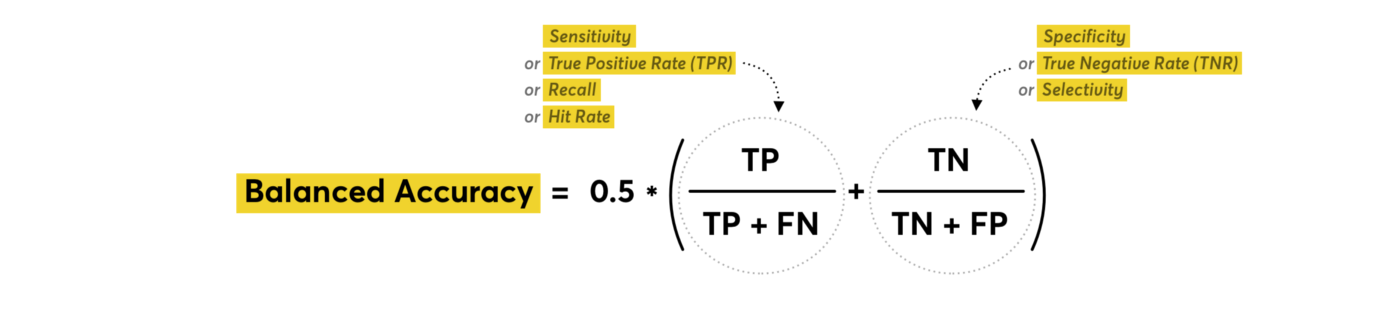

In [ ]:
display.Image('/content/bal_acc.png')

97.7% is the balanced accuracy in this case. Not bad, but definitely less than 99.9 percent that we had with seperating 0s and 1s

## Fisher Discriminant

In [3]:
# Collect features from 1's and 0's -- training data only
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
numzeros = len(x_train[y_train==0])
numones = len(x_train[y_train==1])
print(f'Number of 0s in x trian: {numzeros}')
print(f'Number of 1s in x trian: {numones}')
print(f'Percentage of 0s in x train: {np.round(numzeros / len(x_train), 2) * 100}%')
print(f'Percentage of 1s in x train: {np.round(numones / len(x_train), 2) * 100}%')

Number of 0s in x trian: 5923
Number of 1s in x trian: 6742
Percentage of 0s in x train: 47.0%
Percentage of 1s in x train: 53.0%


We need a few things to be able to calculate the objective function for good seperation
1. Between-Class-Scatter --> Distance between means (so we need the means of the clusters)
2. Within-Class-Scatter

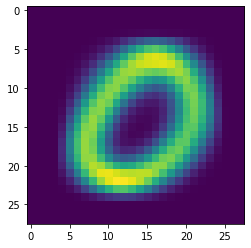

In [ ]:
# First let's calculate between class scatter (distance between means)

# m1 = class 0
m1 = np.mean(x_train[y_train==0], axis=0)
plt.imshow(m1) # visualize average image for mean of class 0

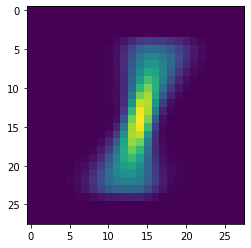

In [ ]:
#m2 = class 1
m2 = np.mean(x_train[y_train==1], axis=0)
plt.imshow(m2) # visualize average image for mean of class 1

w ∝ S_W^-1 * (m2 − m1)

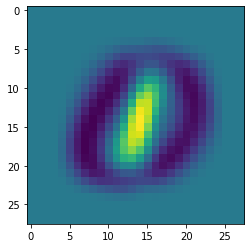

In [ ]:
term_2 = m2-m1 # this is the term 2.
plt.imshow(m2 - m1)

Need to calculate S_w and takes it inverse and multiply it by term_2 (distance between means) to get our W.

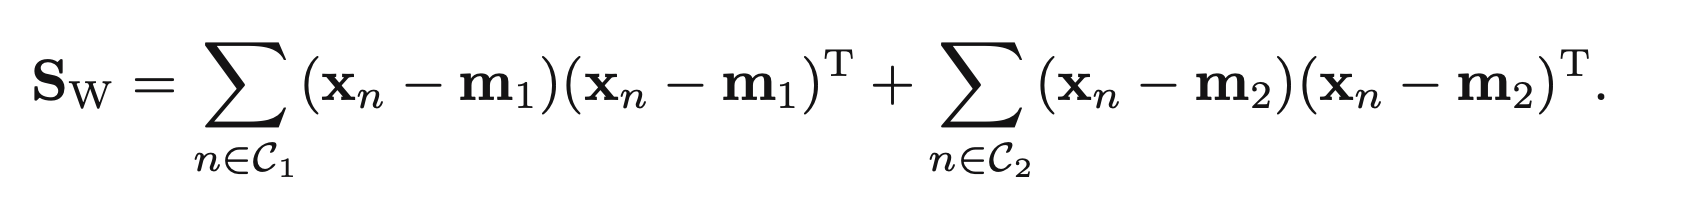

In [ ]:
display.Image('/content/Sw.png')

Need to calculate Sw.

Left term is for C1, right term is for C2
C1 is Class 0 for us (all the 0s) and C2 is class 1 for us (all the 1s)

In [ ]:
#instantiate np arrays of zeros
term1_arr = term2_arr = np.zeros(shape=(28, 28))

for i in range(numzeros):
    term1_arr += np.multiply((x_train[y_train==0][i] - m1), (x_train[y_train==0][i] - m1).T)

for i in range(numones):
    term2_arr += np.multiply((x_train[y_train==1][i] - m2), (x_train[y_train==1][i] - m2).T)
# np.multiply((x_train[y_train==0] - m1), (x_train[y_train==0] - m1).T), axis=1)

Shape of Sw: (28, 28)


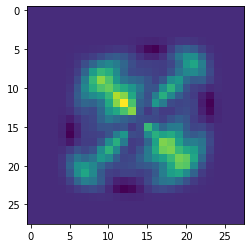

In [ ]:
Sw = term1_arr + term2_arr
print(f'Shape of Sw: {Sw.shape}')
plt.imshow(Sw);

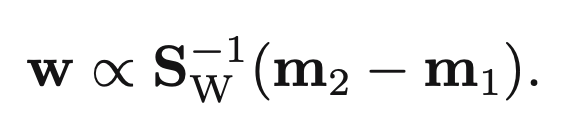

In [ ]:
display.Image('/content/sw2.png')

In [ ]:
W = np.linalg.pinv(Sw) * (m2 - m1) #note: I had to use np.linalg.pinv instead of np.linalg.inv because for some reason Sw was a singualar matrix for me

In [ ]:
np.shape(W)

(28, 28)

Now that we have calculated our W, we can compress the dimensionality down as such:


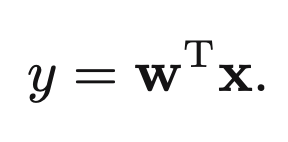

In [ ]:
display.Image('/content/Screenshot 2022-11-09 at 9.34.54 PM.png')

In [ ]:
W.T @ x_train[y_train==0][0]

(28, 28)

### This approach doesnt seem correct. I didn't consider features from the samples. Let's try it again but consider features:

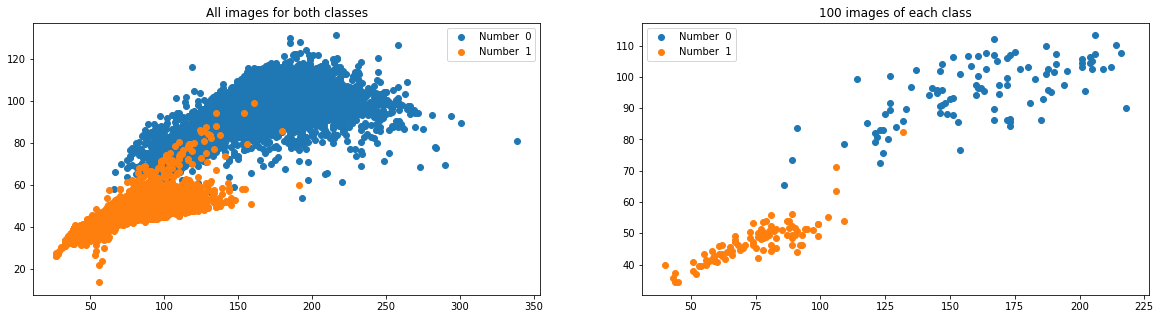

In [4]:
number = 0

x5 = x_train[y_train==number,:,:]
x6 = x_train[y_train==number+1,:,:]
buf5 = "Number  %d" % number
buf6 = "Number  %d" % (number+1)
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

# Region properties
area5 = np.zeros(t5.shape[0])
perimeter5 = np.zeros(t5.shape[0])
for i in range(0,t5.shape[0]):
  props = measure.regionprops(t5[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  
area6 = np.zeros(t6.shape[0])
perimeter6 = np.zeros(t6.shape[0])
for i in range(0,t6.shape[0]):
  props = measure.regionprops(t6[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area5,perimeter5, label=buf5)
plt.scatter(area6,perimeter6, label=buf6)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(area5[0:100],perimeter5[0:100], label=buf5)
plt.scatter(area6[0:100],perimeter6[0:100], label=buf6)
plt.title('100 images of each class')
plt.legend()

In [5]:
area0 = area5
area1 = area6
perim0 = perimeter5
perim1 = perimeter6

areas = np.concatenate((area0, area1))
perims = np.concatenate((perim0, perim1))

# we also need a way to track what the label for the feature is (i.e. what class does it belong to)
labels = np.zeros(perims.shape)
#so we're dealing with 0 and 1 as the label
labels[0:len(area0)] = 0
labels[len(area0):] = 1

# So each point will have an area and a perimeter, we can make the area the first column and the perimeter the second column
# We also will need labels for these points
arr = np.stack((areas, perims), axis=1)
arr


array([[146.        ,  90.66904756],
       [167.        ,  89.59797975],
       [173.        ,  84.18376618],
       ...,
       [ 60.        ,  45.42031022],
       [ 73.        ,  52.39087297],
       [ 48.        ,  35.69238816]])

In [6]:
print(f'labels shape: {labels.shape}')
print(f'arr shape: {arr.shape}')

labels shape: (12665,)
arr shape: (12665, 2)


Now we can continue to calculate the fisher discriminate

#### Class means

In [ ]:
# first lets get m1, which will consist of the average of the mean and perimeter of all elements in class 1
m1 = np.mean(arr[labels==0], axis=0)
print(f'Mean area for class label 0: {m1[0]}\nMean perimeter for class label 0: {m1[1]}')

#let's get m2 the same way
m2 = np.mean(arr[labels==1], axis=0)
print(f'\nMean area for class label 1: {m2[0]}\nMean perimeter for class label 1: {m2[1]}')

Mean area for class label 0: 161.60864426810738
Mean perimeter for class label 0: 95.04012191784521

Mean area for class label 1: 71.65114209433402
Mean perimeter for class label 1: 45.75754109074013


#### Scatter

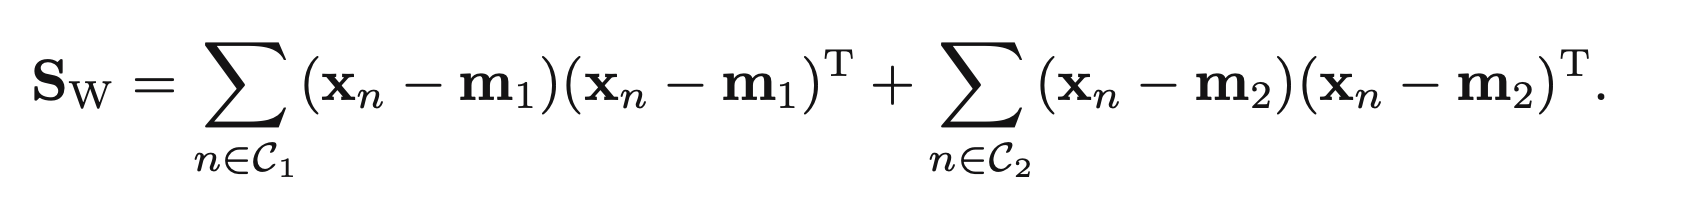

In [ ]:
display.Image('/content/Sw.png')

In [ ]:
# Let's calculate first term 1, nEC1
term1 = np.dot((arr[labels==0] - m1), (arr[labels==0]-m1).T)

#Calc the second term
term2 = np.dot((arr[labels==1]-m2), (arr[labels==1]-m2).T)

In [ ]:
term1 + term2

ValueError: ignored

Let's drop some data from the other class and try this again because then the data sets will be of equal sample size.

In [ ]:
sum(labels==1) - sum(labels==0)

819

We need to get rid of 819 points from the end of the array because that is how many extra data points there are for class with label = 1. 

So just take the entire np array from 0:len(arr)-819

In [7]:
arr = arr[0:len(arr)-819]
print(f'Arr new shape: {arr.shape}')
labels = labels[0:len(labels)-819]
print(f'Labels new shape: {labels.shape}')

Arr new shape: (11846, 2)
Labels new shape: (11846,)


In [8]:
# Let's confirm that the number of classes are equal now
assert np.sum(labels==0) == np.sum(labels==1), 'Labels are not equal'

Good. Now we can continue with the process

In [9]:
# first lets get m1, which will consist of the average of the mean and perimeter of all elements in class 1
m1 = np.mean(arr[labels==0], axis=0)
print(f'Mean area for class label 0: {m1[0]}\nMean perimeter for class label 0: {m1[1]}')

#let's get m2 the same way
m2 = np.mean(arr[labels==1], axis=0)
print(f'\nMean area for class label 1: {m2[0]}\nMean perimeter for class label 1: {m2[1]}')

Mean area for class label 0: 161.60864426810738
Mean perimeter for class label 0: 95.04012191784521

Mean area for class label 1: 71.9623501603917
Mean perimeter for class label 1: 45.79996702295044


In [11]:
# Let's calculate first term 1, nEC1
term1 = np.dot((arr[labels==0] - m1), (arr[labels==0]-m1).T)

#Calc the second term
term2 = np.dot((arr[labels==1]-m2), (arr[labels==1]-m2).T)

Sw = term1+ term2
print(f'Sw shape: {Sw.shape}')

Sw shape: (5923, 5923)


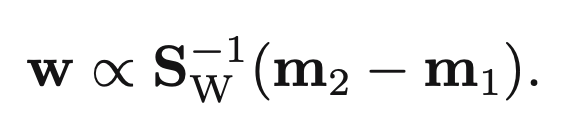

In [12]:
display.Image('/content/Screenshot 2022-11-09 at 9.28.49 PM.png')

In [14]:
# Lastly, calculate the W
W = np.linalg.inv(Sw) * (m2 - m1)

ValueError: ignored

Well unfortunately I ran into another error. Next steps would've just been to project the dimension down and then come up with a threshold and classify. Lastly, run it on the test set and get y_preds and calculate the balanced classification accuracy from before

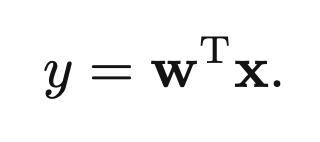

In [15]:
display.Image('/content/Screenshot 2022-11-10 at 3.34.34 PM.png')

Let's visualize the features area and perimeter for 5s and 6s and see if they'd be a good feature to separate 5s and 6s

11490434/11490434 [==============================] - 2s 0us/step


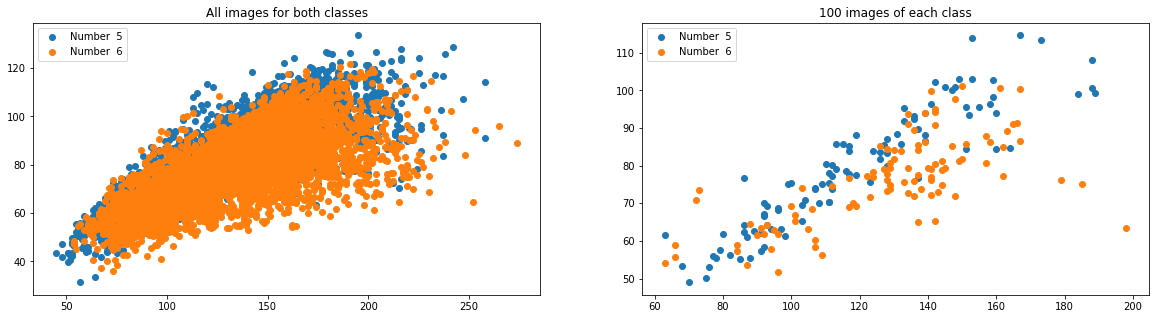

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

number = 5

x5 = x_train[y_train==number,:,:]
x6 = x_train[y_train==number+1,:,:]
buf5 = "Number  %d" % number
buf6 = "Number  %d" % (number+1)
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

# Region properties
area5 = np.zeros(t5.shape[0])
perimeter5 = np.zeros(t5.shape[0])
for i in range(0,t5.shape[0]):
  props = measure.regionprops(t5[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  
area6 = np.zeros(t6.shape[0])
perimeter6 = np.zeros(t6.shape[0])
for i in range(0,t6.shape[0]):
  props = measure.regionprops(t6[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area5,perimeter5, label=buf5)
plt.scatter(area6,perimeter6, label=buf6)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(area5[0:100],perimeter5[0:100], label=buf5)
plt.scatter(area6[0:100],perimeter6[0:100], label=buf6)
plt.title('100 images of each class')
plt.legend()

There's a lot of over-lap so these features, area and perimeter are not good to try and classify between the classes 5 and 6.